In [1]:
import json
import os, glob

from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from collections import defaultdict

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import seaborn as sns
sns.set_style('whitegrid')


In [2]:
dataset_to_visualize = 'fm_toy_dataset'
split_to_visualize = 'train'

In [3]:
dataset_params_csv = os.path.join('data', dataset_to_visualize, split_to_visualize,
                                  'params_dataset.csv')
dataset_params_df = pd.read_csv(dataset_params_csv, index_col=0)

cols_to_drop = []
for col in dataset_params_df.columns:
    dataset_params_df[col] = dataset_params_df[col].map(lambda x: json.loads(x.replace("'", '"')))
    val = dataset_params_df.loc[0, col]
    if val['operation'] == 'None':
        cols_to_drop.append(col)

dataset_params_df.drop(cols_to_drop, axis=1, inplace=True)

In [6]:
def visualize_params(param_column):

    op = param_column[0]['operation']
    param_names = list(param_column[0]['parameters'].keys())

    for p in param_names:
        vals = [c['parameters'][p] for c in param_column]
        plt.hist(vals, bins=20)
        plt.title(f"{op} {p}")
        plt.show()

    return

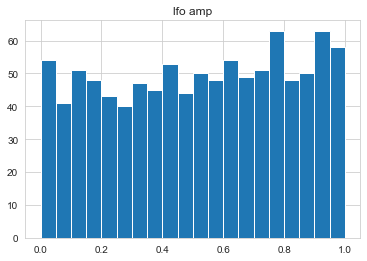

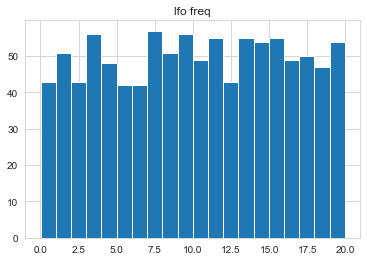

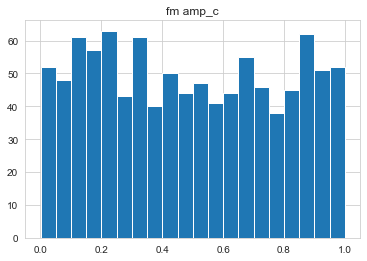

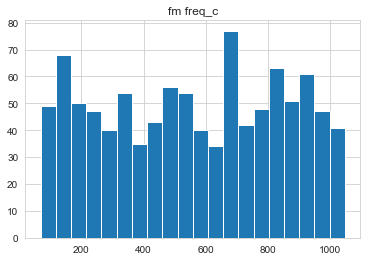

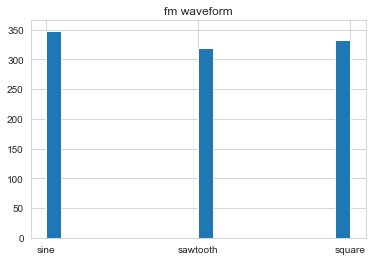

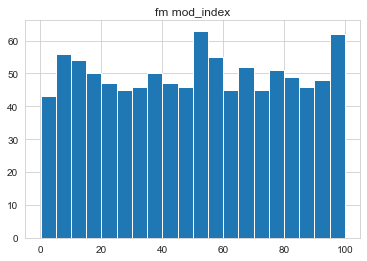

In [7]:
for col in dataset_params_df.columns:
    vals = dataset_params_df[col].values
    visualize_params(vals)